# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

## Introduction:

* The conventional process of testing the compressive strength of concrete involves casting several cubes for the respective grade (such as M5, M10, M15 etc.) and observing the strength of the concrete over a period of time ranging from 7 to 28 days. 

* Various combinations of the components of concrete are selected and cubes for each combination is casted and its test strength at 7, 14 and 28 days is noted dow.

* This is a time consuming and rather tedious process. 

#### This project aims to predict the compressive strength of concrete with maximum accuracy, for various quantities of constituent components as the input.

* The conrete cube exhibits behavioral differences in their compressive strengths for cubes that are cured/not cured. Curing is the process of maintaining the moisture to ensure uninterrupted hydration of concrete.

* The concrete strength increases if the concrete cubes are cured periodically. The rate of increase in strength is described here.

|Time|% Of Total Strength Achieved|
|---|---|
|1 day|16%|
|3 days|40%|
|7 days|65%|
|14 days|90%|
|28 days|99%|

* At 28 days, concrete achieves 99% of the strength. Thus usual measurements of strength are taken at 28 days.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
concrete_data = pd.read_csv('./compresive_strength_concrete.csv')

In [4]:
concrete_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
a = list(concrete_data.columns)
a

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [6]:
column = [i.split('(')[0] for i in a]
column

['Cement ',
 'Blast Furnace Slag ',
 'Fly Ash ',
 'Water  ',
 'Superplasticizer ',
 'Coarse Aggregate  ',
 'Fine Aggregate ',
 'Age ',
 'Concrete compressive strength']

In [7]:
dic = {}
col_lst = list(concrete_data.columns)
for i, col in enumerate(column):
    dic[col_lst[i]] = col
dic

{'Cement (component 1)(kg in a m^3 mixture)': 'Cement ',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag ',
 'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash ',
 'Water  (component 4)(kg in a m^3 mixture)': 'Water  ',
 'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer ',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate  ',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate ',
 'Age (day)': 'Age ',
 'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength'}

In [8]:
concrete_data.rename(columns=dic, inplace=True)

In [9]:
concrete_data.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age ',
       'Concrete compressive strength'],
      dtype='object')

In [10]:
concrete_data.isnull().any()

Cement                           False
Blast Furnace Slag               False
Fly Ash                          False
Water                            False
Superplasticizer                 False
Coarse Aggregate                 False
Fine Aggregate                   False
Age                              False
Concrete compressive strength    False
dtype: bool

In [11]:
concrete_data.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [12]:
concrete_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [13]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [14]:
labels = concrete_data["Concrete compressive strength"]
concrete_data.drop(columns="Concrete compressive strength", inplace=True)

In [15]:
labels = np.array(labels.astype('float32'))
concrete_data = np.array(concrete_data.iloc[:])

In [16]:
labels

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_data, test_data, train_l, test_l = train_test_split(concrete_data, labels, test_size=0.3)

In [19]:
test_data.shape

(309, 8)

In [20]:
test_l.shape

(309,)

Normalization

In [22]:
t_mean = train_data.mean(axis=0)
t_std = train_data.std(axis=0)

train_data -= t_mean
train_data /= t_std

test_data -= t_mean
test_data /= t_std

In [29]:
partial_train , val_train, partial_labels, val_labels = train_test_split(train_data, train_l, test_size=0.2)

In [31]:
train_data.shape

(721, 8)

In [30]:
val_train.shape

(145, 8)

In [34]:
from keras import models, layers

In [35]:
def build_model(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation= act))
    model.add(layers.Dense(6, activation= act))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics='mae')
    return model

In [36]:
network = build_model('relu')

In [37]:
                      batch_size=1, validation_data=(val_train, val_labels))

Epoch 1/100
576/576 [==============================] - 1s 3ms/step - loss: 1168.7349 - mae: 29.6998 - val_loss: 522.4595 - val_mae: 18.1371
Epoch 2/100
576/576 [==============================] - 1s 2ms/step - loss: 281.1129 - mae: 13.3359 - val_loss: 193.9970 - val_mae: 11.4071
Epoch 3/100
576/576 [==============================] - 1s 2ms/step - loss: 190.8756 - mae: 11.1572 - val_loss: 170.8704 - val_mae: 10.6683
Epoch 4/100
576/576 [==============================] - 1s 2ms/step - loss: 170.8091 - mae: 10.5259 - val_loss: 170.8766 - val_mae: 10.4042
Epoch 5/100
576/576 [==============================] - 1s 2ms/step - loss: 161.7545 - mae: 10.1417 - val_loss: 175.5261 - val_mae: 10.3942
Epoch 6/100
576/576 [==============================] - 1s 2ms/step - loss: 158.0258 - mae: 9.9628 - val_loss: 177.3244 - val_mae: 10.2896
Epoch 7/100
576/576 [==============================] - 1s 2ms/step - loss: 155.9101 - mae: 9.7255 - val_loss: 169.1349 - val_mae: 10.1850
Epoch 8/100
576/576 [=======

In [39]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [42]:
epochs = range(1,101)

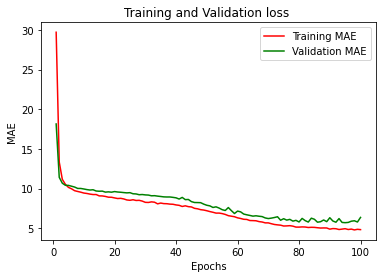

In [43]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [44]:
network = build_model('relu')
history = network.fit(partial_train, partial_labels, epochs=200, verbose=0, 
                      batch_size=1, validation_data=(val_train, val_labels))

Epoch 1/200
576/576 [==============================] - 1s 2ms/step - loss: 992.0522 - mae: 26.4119 - val_loss: 416.6356 - val_mae: 14.7807
Epoch 2/200
576/576 [==============================] - 1s 1ms/step - loss: 322.0807 - mae: 14.1151 - val_loss: 259.9804 - val_mae: 12.6183
Epoch 3/200
576/576 [==============================] - 1s 2ms/step - loss: 237.0411 - mae: 12.2908 - val_loss: 215.0244 - val_mae: 11.5379
Epoch 4/200
576/576 [==============================] - 1s 2ms/step - loss: 194.6293 - mae: 11.2203 - val_loss: 199.2782 - val_mae: 11.1660
Epoch 5/200
576/576 [==============================] - 1s 2ms/step - loss: 170.1559 - mae: 10.4309 - val_loss: 170.8390 - val_mae: 10.4070
Epoch 6/200
576/576 [==============================] - 1s 2ms/step - loss: 154.9994 - mae: 9.8647 - val_loss: 162.8125 - val_mae: 10.0466
Epoch 7/200
576/576 [==============================] - 1s 2ms/step - loss: 143.3882 - mae: 9.4038 - val_loss: 147.8482 - val_mae: 9.5690
Epoch 8/200
576/576 [=========

Epoch 61/200
576/576 [==============================] - 1s 1ms/step - loss: 36.2332 - mae: 4.4313 - val_loss: 50.9868 - val_mae: 5.0931
Epoch 62/200
576/576 [==============================] - 1s 1ms/step - loss: 35.3848 - mae: 4.4548 - val_loss: 49.5582 - val_mae: 4.8933
Epoch 63/200
576/576 [==============================] - 1s 1ms/step - loss: 35.7126 - mae: 4.3894 - val_loss: 46.4273 - val_mae: 4.8758
Epoch 64/200
576/576 [==============================] - 1s 1ms/step - loss: 36.0597 - mae: 4.4246 - val_loss: 49.3484 - val_mae: 4.9270
Epoch 65/200
576/576 [==============================] - 1s 1ms/step - loss: 35.9383 - mae: 4.3975 - val_loss: 47.1647 - val_mae: 4.8055
Epoch 66/200
576/576 [==============================] - 1s 1ms/step - loss: 36.1570 - mae: 4.4234 - val_loss: 49.3394 - val_mae: 4.9709
Epoch 67/200
576/576 [==============================] - 1s 1ms/step - loss: 34.6840 - mae: 4.4151 - val_loss: 49.4979 - val_mae: 4.9903
Epoch 68/200
576/576 [==========================

576/576 [==============================] - 1s 1ms/step - loss: 27.0502 - mae: 3.7662 - val_loss: 45.5694 - val_mae: 4.5192
Epoch 122/200
576/576 [==============================] - 1s 1ms/step - loss: 26.4170 - mae: 3.7370 - val_loss: 50.3135 - val_mae: 4.7656
Epoch 123/200
576/576 [==============================] - 1s 1ms/step - loss: 26.1507 - mae: 3.7382 - val_loss: 50.3704 - val_mae: 4.6515
Epoch 124/200
576/576 [==============================] - 1s 1ms/step - loss: 26.5949 - mae: 3.7562 - val_loss: 46.9604 - val_mae: 4.6644
Epoch 125/200
576/576 [==============================] - 1s 1ms/step - loss: 26.9581 - mae: 3.7803 - val_loss: 50.6423 - val_mae: 4.9604
Epoch 126/200
576/576 [==============================] - 1s 1ms/step - loss: 27.2019 - mae: 3.7915 - val_loss: 43.2060 - val_mae: 4.6535
Epoch 127/200
576/576 [==============================] - 1s 1ms/step - loss: 27.0233 - mae: 3.7891 - val_loss: 44.8323 - val_mae: 4.4245
Epoch 128/200
576/576 [==============================] 

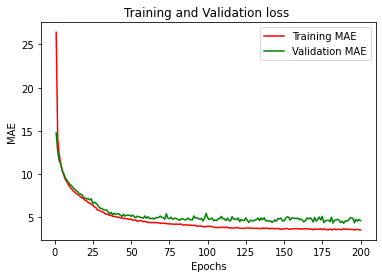

In [45]:
epochs = range(1,201)
train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [46]:
network = build_model('tanh')
history = network.fit(partial_train, partial_labels, epochs=200, verbose=0
                      batch_size=1, validation_data=(val_train, val_labels))

Epoch 1/200
576/576 [==============================] - 2s 3ms/step - loss: 1396.0382 - mae: 33.4281 - val_loss: 1247.3433 - val_mae: 31.0279
Epoch 2/200
576/576 [==============================] - 1s 2ms/step - loss: 1120.3912 - mae: 29.0655 - val_loss: 1035.6659 - val_mae: 27.4477
Epoch 3/200
576/576 [==============================] - 1s 2ms/step - loss: 933.6628 - mae: 25.7826 - val_loss: 864.4324 - val_mae: 24.3281
Epoch 4/200
576/576 [==============================] - 1s 2ms/step - loss: 778.8406 - mae: 22.9174 - val_loss: 721.7674 - val_mae: 21.6247
Epoch 5/200
576/576 [==============================] - 1s 2ms/step - loss: 649.2272 - mae: 20.5819 - val_loss: 605.7635 - val_mae: 19.4836
Epoch 6/200
576/576 [==============================] - 1s 1ms/step - loss: 545.0125 - mae: 18.6996 - val_loss: 514.3820 - val_mae: 17.7599
Epoch 7/200
576/576 [==============================] - 1s 2ms/step - loss: 468.1439 - mae: 17.1418 - val_loss: 446.2043 - val_mae: 16.3571
Epoch 8/200
576/576 [==

576/576 [==============================] - 1s 2ms/step - loss: 277.3749 - mae: 13.4327 - val_loss: 285.2304 - val_mae: 13.5310
Epoch 118/200
576/576 [==============================] - 2s 3ms/step - loss: 277.2970 - mae: 13.4400 - val_loss: 285.2567 - val_mae: 13.5293
Epoch 119/200
576/576 [==============================] - 2s 3ms/step - loss: 277.3500 - mae: 13.4384 - val_loss: 285.2443 - val_mae: 13.5301
Epoch 120/200
576/576 [==============================] - 1s 2ms/step - loss: 277.3611 - mae: 13.4357 - val_loss: 285.2291 - val_mae: 13.5311
Epoch 121/200
576/576 [==============================] - 1s 2ms/step - loss: 277.3161 - mae: 13.4391 - val_loss: 285.2416 - val_mae: 13.5302
Epoch 122/200
576/576 [==============================] - 1s 2ms/step - loss: 277.3459 - mae: 13.4366 - val_loss: 285.2686 - val_mae: 13.5286
Epoch 123/200
576/576 [==============================] - 1s 2ms/step - loss: 277.3814 - mae: 13.4345 - val_loss: 285.2491 - val_mae: 13.5298
Epoch 124/200
576/576 [====

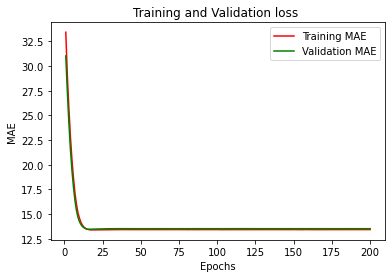

In [47]:
epochs = range(1,201)
train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

We notice that relu activation function showing good results than tanh

<h3>Final training</h3>

In [49]:
network = build_model('relu')
history = network.fit(train_data, train_l, epochs=200, batch_size=1, verbose=0)
test_mse_score, test_mae_score  =network.evaluate(test_data, test_l)

10/10 [==============================] - 0s 5ms/step - loss: 41.7834 - mae: 4.7140


In [52]:
prediction = network.predict(test_data)

In [53]:
prediction

array([[35.21634  ],
       [19.226889 ],
       [14.220342 ],
       [15.535626 ],
       [22.296167 ],
       [17.4149   ],
       [16.080702 ],
       [20.881578 ],
       [27.944305 ],
       [18.334276 ],
       [55.91121  ],
       [46.236744 ],
       [31.415455 ],
       [55.23848  ],
       [39.943607 ],
       [14.689013 ],
       [39.79526  ],
       [58.116997 ],
       [57.67039  ],
       [40.263687 ],
       [45.351513 ],
       [36.73001  ],
       [28.438643 ],
       [34.98474  ],
       [54.17229  ],
       [69.734146 ],
       [12.065369 ],
       [23.042578 ],
       [10.866574 ],
       [51.36403  ],
       [32.61832  ],
       [42.40451  ],
       [22.470318 ],
       [65.28928  ],
       [66.230965 ],
       [18.788519 ],
       [34.250507 ],
       [44.072403 ],
       [22.952646 ],
       [73.55794  ],
       [63.63623  ],
       [16.276003 ],
       [35.48331  ],
       [63.173534 ],
       [38.4403   ],
       [54.08299  ],
       [37.915154 ],
       [43.67

In [54]:
test_l[0]

33.54